# GRADUATE ADMISSIONS

Our aim here is to conduct a wide variety of analyzes and forecasting operations using the data set here.

The dataset contains several parameters which are considered important during the application for Masters Programs. 

The parameters included are :

#GRE Scores ( out of 340 )
#TOEFL Scores ( out of 120 )
#University Rating ( out of 5 )
#Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
#Undergraduate GPA ( out of 10 )
#Research Experience ( either 0 or 1 )
#Chance of Admit ( ranging from 0 to 1 )

# INTRODUCTION
In this project, there are many exam points taken in various exam systems. A variety of analyzes will be obtained from these exams. We will use python programming language. Our system will consist of three stages. The first stage data will be preprocessed. However, there are various analyzes and graphs. In the next step, a wide variety of analyzes will be made by using Regression algorithms. 

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing neccessary plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\prane\\Downloads\\DSE FILES\\ALL PROJECTS\\Graduate Admissions Project\\Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploratory Data Analysis(EDA)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
print('Descriptive Statastics of our Data:')
df.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
print('Showing Meta Data :')
df.info()

Showing Meta Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
#Renaming columns 
df.columns = ['sno','GRE','TOEFL','university_rating','SOP','LOR','CGPA','research','admit_chance']
df.head()

,sno,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research,admit_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Checking for missing values
pd.isnull(df).sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

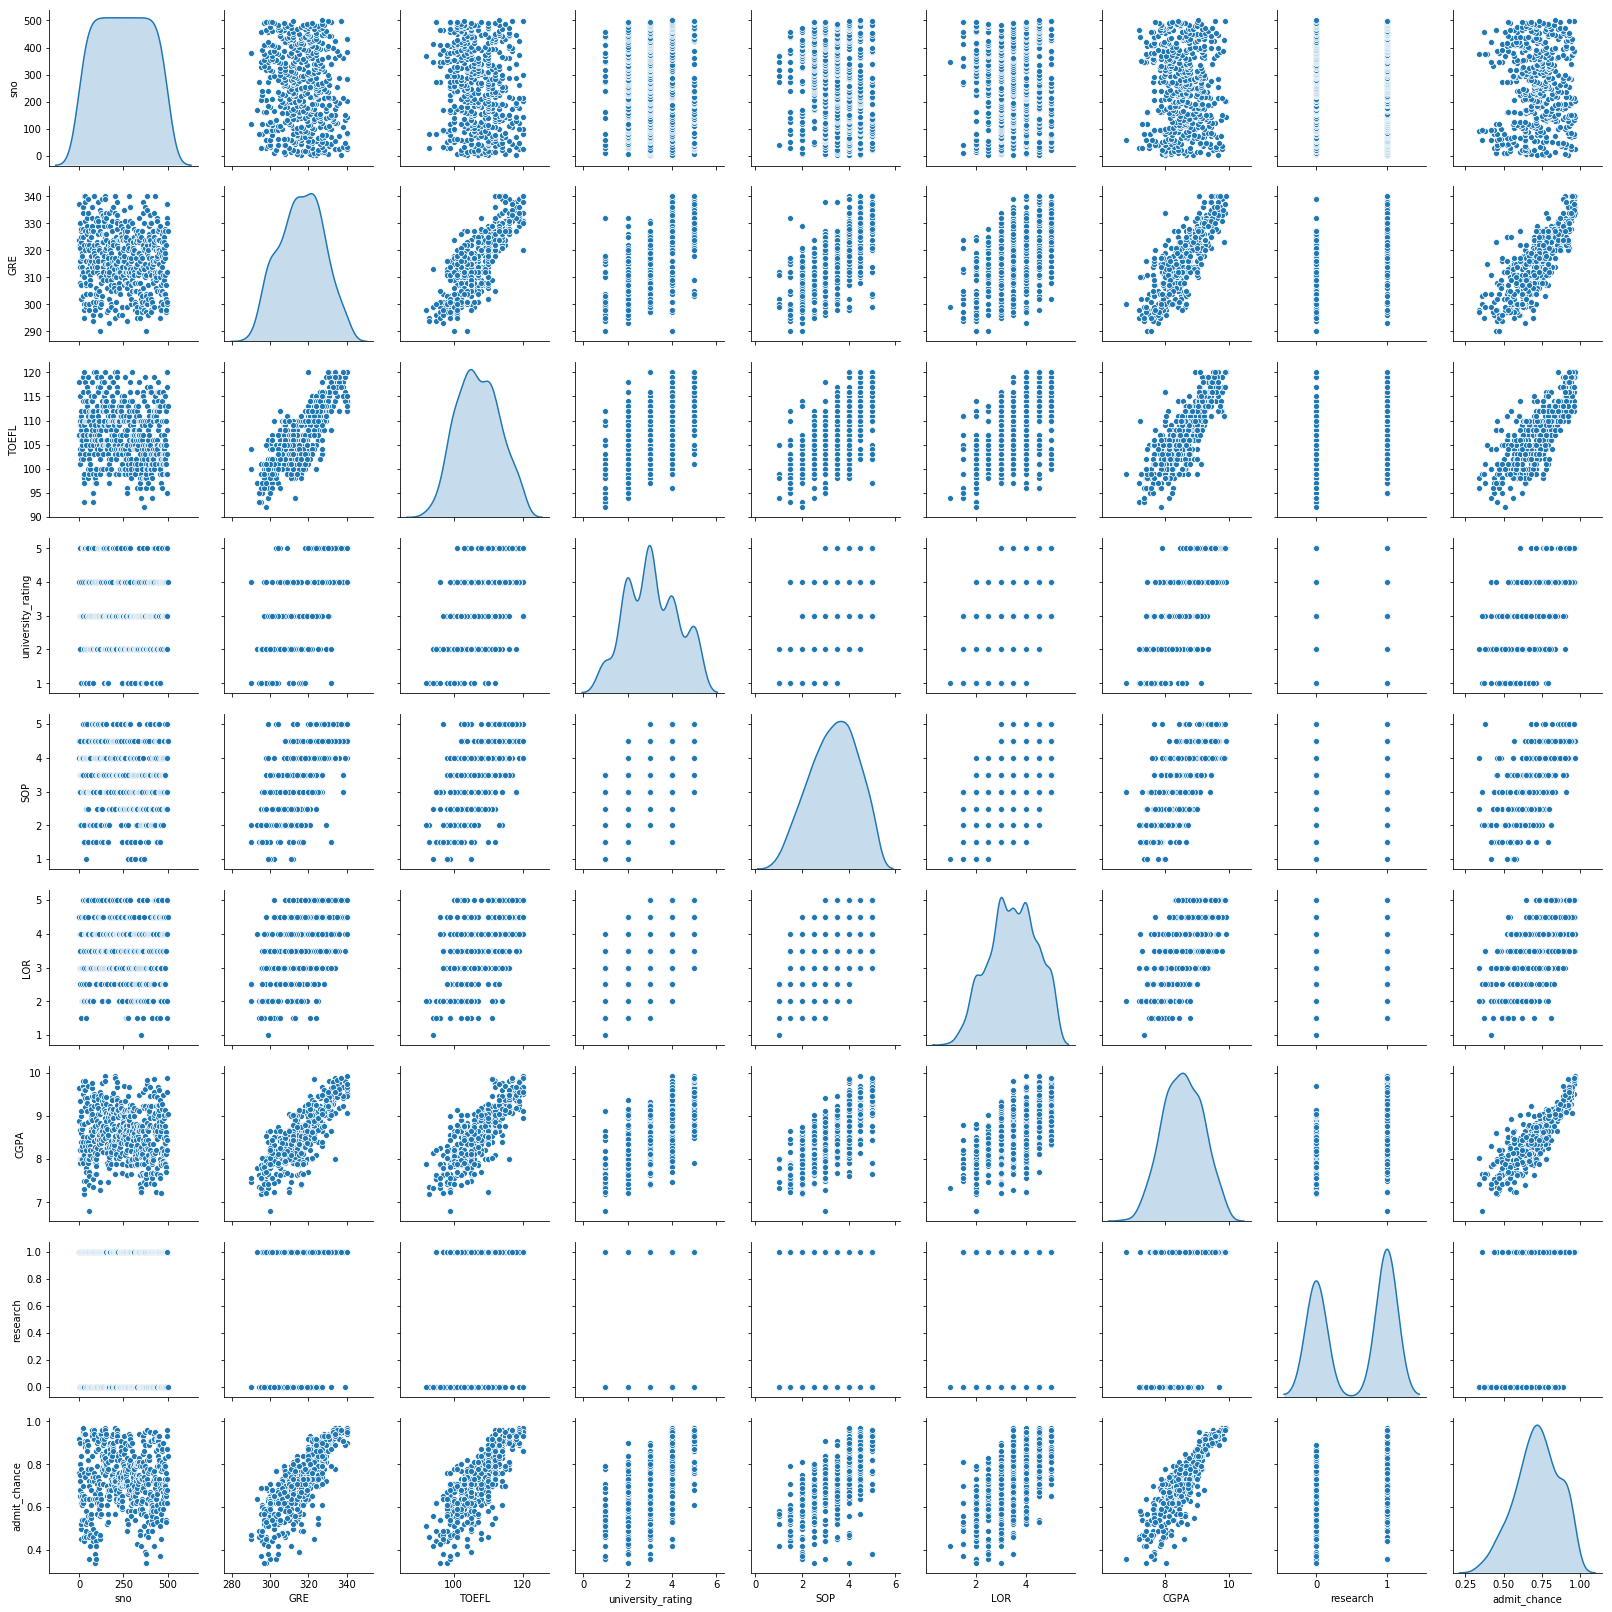

In [10]:
sns.pairplot(data=df,diag_kind='kde')

Correlation Heat map of the data


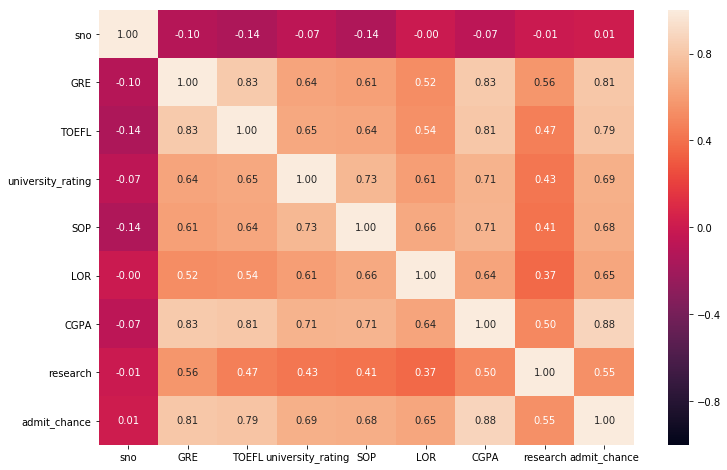

In [11]:
print('Correlation Heat map of the data')
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.show()

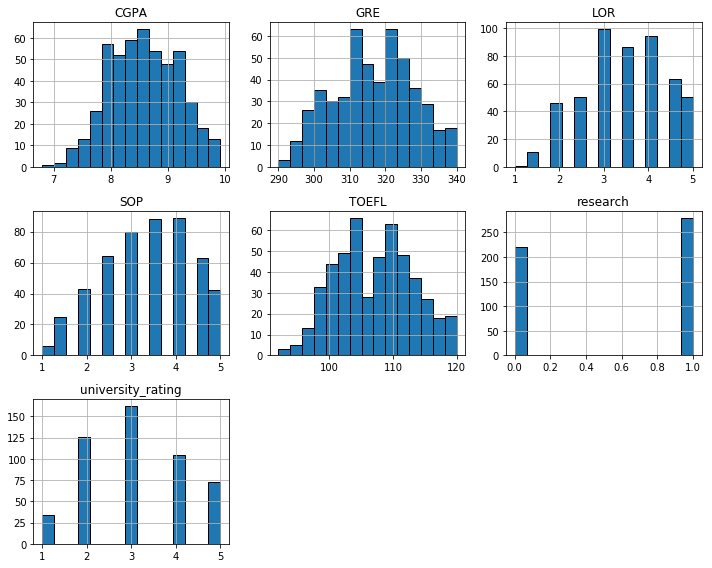

In [52]:
df[['GRE','TOEFL','university_rating','CGPA','SOP','LOR','research']].hist(figsize=(10,8),bins=15,linewidth='1',edgecolor='black')
plt.tight_layout()
plt.show()

In [13]:
df.research.value_counts()

1    280
0    220
Name: research, dtype: int64

research
0    0.645
1    0.800
Name: admit_chance, dtype: float64


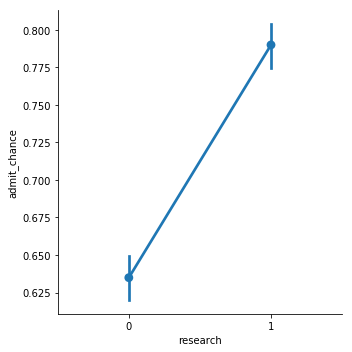

In [58]:
#Chances of admission wrt research
chances=df.groupby('research')['admit_chance'].median()
print(chances)
sns.factorplot('research','admit_chance',data=df)
plt.show()

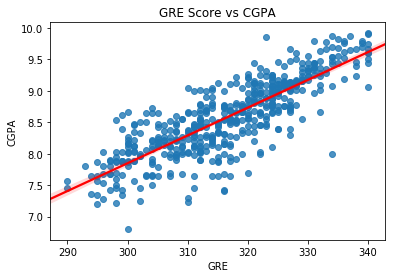

In [15]:
sns.regplot(x="GRE",y="CGPA", data=df,line_kws={'color':'red'})
plt.title("GRE Score vs CGPA")
plt.show()

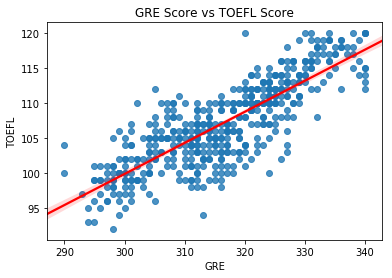

In [54]:
sns.regplot(x="GRE",y="TOEFL", data=df,line_kws={'color':'red'})
plt.title("GRE Score vs TOEFL Score")
plt.show()

In [17]:
df.university_rating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: university_rating, dtype: int64

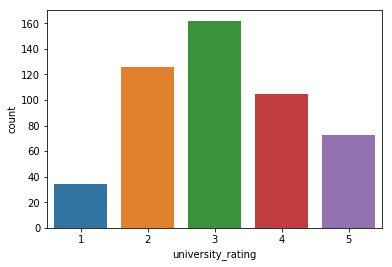

In [18]:
sns.countplot(df.university_rating)

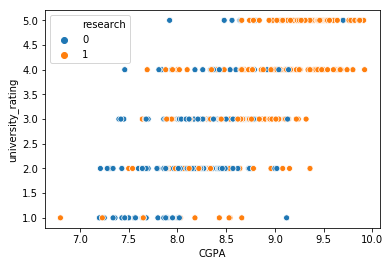

In [19]:
sns.scatterplot(x="CGPA", y="university_rating", hue="research", data=df)
plt.show()

In [20]:
print('Avg. GRE scores based on University Ratings')

pd.DataFrame(df.groupby('university_rating')['GRE'].mean())

Avg. GRE scores based on University Ratings


,GRE
university_rating,
1,304.911765
2,309.134921
3,315.030864
4,323.304762
5,327.890411


In [21]:
print('Avg. TOEFL scores based on University Ratings')

pd.DataFrame(df.groupby('university_rating')['TOEFL'].mean())

Avg. TOEFL scores based on University Ratings


,TOEFL
university_rating,
1,100.205882
2,103.444444
3,106.314815
4,110.961905
5,113.438356


In [22]:
df.groupby('university_rating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
university_rating,,,
1,1.941176,2.426471,7.798529
2,2.682540,2.956349,8.177778
3,3.308642,3.401235,8.500123
4,4.000000,3.947619,8.936667
5,4.479452,4.404110,9.278082


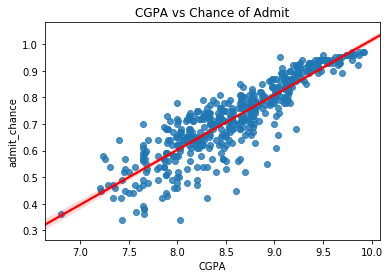

In [23]:
sns.regplot(x="CGPA",y="admit_chance", data=df,line_kws={'color':'red'})
plt.title("CGPA vs Chance of Admit")
plt.show()

In [60]:
#The mean values for getting admisssion chances greater than 80%

admt_sort = df.sort_values(by=df.columns[-1],ascending=False)

admt_sort[(admt_sort['admit_chance']>0.80)].mean().reset_index().T

,0,1,2,3,4,5,6,7,8
index,sno,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research,admit_chance
0,240.789,328.451,113.796,4.27465,4.30282,4.23592,9.27768,0.93662,0.88993


# Building Models

In [25]:
x = df.drop(['sno','admit_chance'],axis=1)
x.head()

,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [26]:
y=df['admit_chance']

# Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x_std.head()

C:\Users\prane\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prane\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


# Outlier Detection

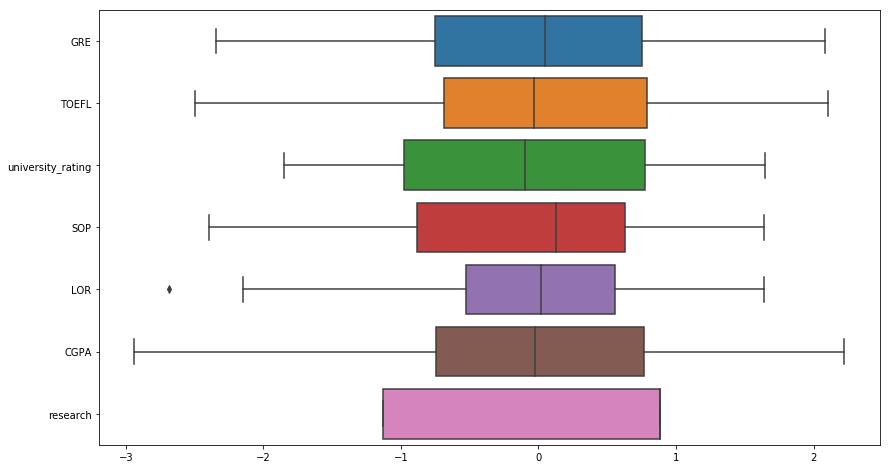

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(data=x_std,orient='h')
plt.show()

In [29]:
std_df=pd.concat([x_std,y],axis=1)
print(std_df.shape)
std_df.head()

(500, 8)


,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research,admit_chance
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


In [30]:
from statsmodels.formula.api import ols
M = ols('admit_chance~GRE+TOEFL+university_rating+SOP+LOR+CGPA+research',std_df).fit()
M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           admit_chance   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          8.21e-180
Time:                        17:29:37   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7217      0.003    269.039      0.000       0.716       0.727
GRE                   0.0210      0.006      3.700      0.000       0.010       0.032
TOEFL                 0.0169      0.005      3.184      0.002       0.006       0.027
university_rating     0.0068      0.004      1.563      0.119      -0.002       0.015
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.010
LOR                   0.0156      0.004      4.074      0.000       0.008       0.023
CGPA                  0.0715      0.006     12.198      0.000       0.060       0.083
research              0.0121      0.003      3.680      0.000       0.006       0.019
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         5.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
M2 = ols('admit_chance~GRE+TOEFL+LOR+CGPA+university_rating+research',std_df).fit()
M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           admit_chance   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.1
Date:                Mon, 11 Mar 2019   Prob (F-statistic):          4.29e-181
Time:                        17:29:37   Log-Likelihood:                 701.32
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7217      0.003    269.279      0.000       0.716       0.727
GRE                   0.0209      0.006      3.694      0.000       0.010       0.032
TOEFL                 0.0171      0.005      3.236      0.001       0.007       0.027
LOR                   0.0160      0.004      4.380      0.000       0.009       0.023
CGPA                  0.0719      0.006     12.481      0.000       0.061       0.083
university_rating     0.0073      0.004      1.820      0.069      -0.001       0.015
research              0.0121      0.003      3.691      0.000       0.006       0.019
==============================================================================
Omnibus:                      111.782   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.656
Skew:                          -1.152   Prob(JB):                     6.82e-57
Kurtosis:                       5.667   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
ls = Lasso(alpha=0.02)
ls.fit(x_std,y)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
ls.coef_

array([0.0192941 , 0.01077391, 0.0013607 , 0.        , 0.00662616,
       0.07414277, 0.00084749])

In [35]:
pd.DataFrame([x_std.columns,ls.coef_]).T

,0,1
0,GRE,0.0192941
1,TOEFL,0.0107739
2,university_rating,0.0013607
3,SOP,0
4,LOR,0.00662616
5,CGPA,0.0741428
6,research,0.000847489


In [ ]:
#From the statastical summary and by using Lasso we can conclude that 'SOP' has no significance in predicting 'Y'

# Principle Component Analysis

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pc = pca.fit_transform(x_std)
pc_df = pd.DataFrame(pc)
pc_df.head()

,0,1,2,3,4,5,6
0,-3.568375,-0.328318,-0.608675,-0.512976,-0.201642,-0.062334,-0.016502
1,-1.639199,0.034550,0.867234,-0.105140,0.208110,-0.288858,0.314365
2,0.550991,-0.720794,0.940014,0.066577,0.227870,0.281976,0.532927
3,-0.345470,-1.280237,-0.390081,0.579390,-0.411583,0.077036,-0.026489
4,2.035804,0.039366,-0.691749,-0.616976,0.423746,-0.255878,0.255918


In [37]:
pc_df.shape

(500, 7)

In [38]:
#Explained Variance Ratio
evr = pca.explained_variance_ratio_
print(evr)

[0.67519343 0.10596446 0.08023255 0.0543379  0.03766808 0.02546844
 0.02113513]


In [39]:
#cumulative Variance Ratio
cvr=np.cumsum(evr)
print(cvr)

[0.67519343 0.78115789 0.86139044 0.91572834 0.95339642 0.97886487
 1.        ]


# Linear Regression 

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [83]:
x.head()

,GRE,TOEFL,university_rating,SOP,LOR,CGPA,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [96]:
X=x.drop(['SOP'],axis=1)
X.head()

,GRE,TOEFL,university_rating,LOR,CGPA,research
0,337,118,4,4.5,9.65,1
1,324,107,4,4.5,8.87,1
2,316,104,3,3.5,8.00,1
3,322,110,3,2.5,8.67,1
4,314,103,2,3.0,8.21,0


In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.30, shuffle=True)

In [86]:
Xtrain.shape,Xtest.shape

((350, 6), (150, 6))

In [87]:
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
prediction = model.predict(Xtest)
mse = mean_squared_error(ytest,prediction)
error = np.sqrt(mse)
print('The RMSE value is :',error)

The RMSE value is : 0.0577657112888106


1.0

# Linear Regression on Principle components

In [98]:
Xp = pc_df.iloc[:,:6]
Y = y

In [99]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
training = []
testing = []
rmse = []

In [100]:
for train,test in kf.split(Xp,Y):
    M = LinearRegression()
    Xtrain,Xtest = Xp.iloc[train,:],Xp.iloc[test,:]
    Ytrain,Ytest = Y.iloc[train],Y.iloc[test]
    M.fit(Xtrain,Ytrain)
    Y_PRED = M.predict(Xtest)
    train_score = M.score(Xtrain,Ytrain)
    test_score = M.score(Xtest,Ytest)
    training.append(train_score)
    testing.append(test_score)
    mse = mean_squared_error(Ytest,Y_PRED)
    error = np.sqrt(mse)
    rmse.append(error)
    
print('Training scores: ',training)
print('Testing scores: ', testing)
print('root mean squared errors are : ',rmse)
print("the Average RMSE is : " ,np.mean(rmse)) 

Training scores:  [0.8267717337666356, 0.8207026806412923, 0.8068499044233258, 0.8109985532990815, 0.8099268893251625]
Testing scores:  [0.7505063278029527, 0.7864928541619564, 0.8404896851168305, 0.8262873786374062, 0.8286879325710768]
root mean squared errors are :  [0.06601018566481527, 0.0640673200777895, 0.05672003125682758, 0.05740821932886047, 0.06226752243163804]
the Average RMSE is :  0.06129465575198617


# Ensemble Methods and Algorithm Comparision

In [118]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [124]:
abr = AdaBoostRegressor(n_estimators=5)
gbr = GradientBoostingRegressor(n_estimators=30)
lr = LinearRegression()
abl = AdaBoostRegressor(lr,n_estimators=11)
br = BaggingRegressor(lr,n_estimators=5)

In [123]:
parameter={'n_estimators':np.arange(1,100)}
gs= GridSearchCV(br,parameter,cv=4,scoring='neg_mean_squared_error')
gs.fit(X,y)
gs.best_params_

{'n_estimators': 5}

In [125]:
results = []
names =  []
models = []

models.append(('linear regression',lr))
models.append(('ADA boost regressor',abr))
models.append(('ADA boosted linear regression',abl))
models.append(('Gradient boost',gbr))
models.append(('Bagging Regressor',br))

In [126]:
for name,mod in models:
    kf=KFold(n_splits=5)
    cv_results = cross_val_score(mod,X,y,cv=kf,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
    print(msg)  

linear regression: -0.003891 (0.000008)
ADA boost regressor: -0.005006 (0.000007)
ADA boosted linear regression: -0.004107 (0.000006)
Gradient boost: -0.004361 (0.000009)
Bagging Regressor: -0.003906 (0.000008)


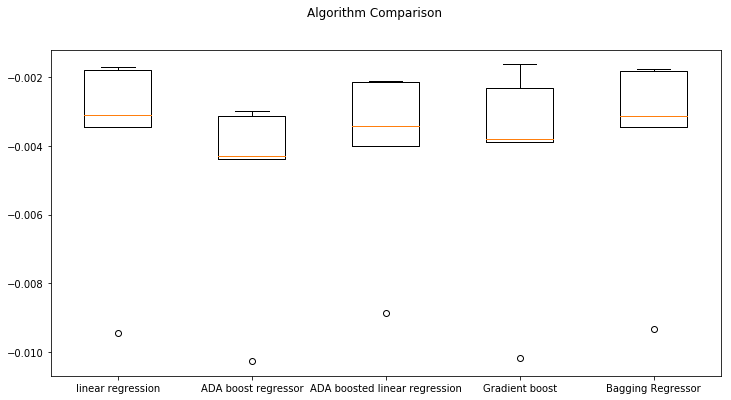

In [127]:
# boxplot algorithm comparison
fig = plt.figure(figsize=[12,6])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#We can see that the Linear Regression fits the data very well with least mean squraed error followd by Bagging Regressor